# Titanic Dataset

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 20)

In [0]:
# Data Sources
titanic_train_url = 'https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv'
titanic_test_url = 'https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/test.csv'

In [0]:
fill_nans = {
    'Cabin': '',
    'Embarked': 'NoVal'
}

df_train = pd.read_csv(titanic_train_url)
df_test = pd.read_csv(titanic_test_url)

df_train.fillna(value=fill_nans, inplace=True)
df_test.fillna(value=fill_nans, inplace=True)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,,C


Check values for categorical variables

In [6]:
df_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [7]:
df_train['Embarked'].value_counts()

S        644
C        168
Q         77
NoVal      2
Name: Embarked, dtype: int64

In [8]:
df_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

### Survival Rates


*   Passenger Class
*   Sex
*   Family Members Aboard
*   Age Bucket



In [9]:
(df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean()
    .sort_values(by='Survived', ascending=False))

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
(df_train[['Sex','Survived']].groupby(['Sex'], as_index=False).mean()
    .sort_values(by='Survived', ascending=False))

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
(df_train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()
    .sort_values(by='Survived', ascending=False))

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
(df_train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()
    .sort_values(by='Survived', ascending=False))

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


290 people survived and 424 people died


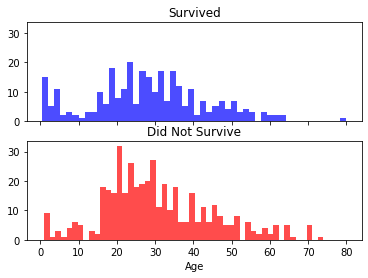

In [13]:
age_survived = df_train[df_train['Survived']==1]['Age'].dropna()
age_died = df_train[df_train['Survived']!=1]['Age'].dropna()

fig, axes = plt.subplots(2, 1, sharex=True, sharey=True)
axes[0].hist(age_survived, bins=50, color='b', alpha=0.7)
axes[0].set_title('Survived')
axes[1].hist(age_died, bins=50, color='r', alpha=0.7)
axes[1].set_xlabel('Age')
axes[1].set_title('Did Not Survive')
print('%d people survived and %d people died' %(age_survived.shape[0],age_died.shape[0]))

40 children survived and 29 children died


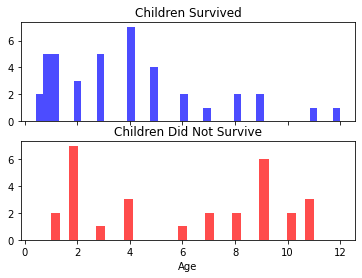

In [14]:
age_children_survived = df_train[(df_train['Survived']==1) & (df_train['Age']<=12)]['Age']
age_children_died = df_train[(df_train['Survived']!=1) & (df_train['Age']<=12)]['Age']

fig, axes = plt.subplots(2, 1, sharex=True, sharey=True)
axes[0].hist(age_children_survived, bins=age_children_survived.shape[0], color='b', alpha=0.7)
axes[0].set_title('Children Survived')
axes[1].hist(age_children_died, bins=age_children_died.shape[0], color='r', alpha=0.7)
axes[1].set_xlabel('Age')
axes[1].set_title('Children Did Not Survive')
print('%d children survived and %d children died' %(age_children_survived.shape[0],age_children_died.shape[0]))

##Prepare for ML
### Prepare Training Set


In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [0]:
df_train['Sex'] = df_train['Sex'].map({'male': 0, 'female': 1}).astype(int)
df_train['Embarked'] = df_train['Embarked'].map({'NoVal': 0, 'C': 1, 'Q':2, 'S':3}).astype(int)

In [17]:
print('Number of training data Ages with null values: %d' % np.sum(df_train.Age.isnull()))

Number of training data Ages with null values: 177


Identify median ages for passenger's by class & sex<br>
<sub>inspired by @raghav96's [approach](https://github.com/raghav96/datascience/blob/master/Titanic%20Dataset%20Kaggle%20Competition.ipynb)</sub>

In [18]:
df_train.pivot_table(
    index=['Sex', 'Pclass'],
    values=['Age'],
    aggfunc=np.median
)

Age
Sex Pclass      
0   1       40.0
    2       30.0
    3       25.0
1   1       35.0
    2       28.0
    3       21.5

In [19]:
df_train.groupby(['Sex', 'Pclass'])[['Age']].aggregate(np.median)

Age
Sex Pclass      
0   1       40.0
    2       30.0
    3       25.0
1   1       35.0
    2       28.0
    3       21.5

In [0]:
median_age = np.zeros((2,3))
for sex in range(2):
    for pclass in range(1,4):
        row = sex
        col = pclass-1
        
        idx = (df_train['Sex'] == sex) & (df_train['Pclass'] == pclass)
        age_guess = np.median(df_train[idx]['Age'].dropna())
        if np.isnan(age_guess):
            idx_sex_only = (df_train['Sex'] == sex)
            age_guess = df_train[idx]['Age'].dropna().median()
        median_age[row,col] = age_guess

In [21]:
print(median_age)

[[40.  30.  25. ]
 [35.  28.  21.5]]


In [0]:
for sex in range(2):
    for pclass in range(1,4):
        row = sex
        col = pclass-1

        df_train.loc[(df_train.Age.isnull()) & (df_train.Sex == sex) & (df_train.Pclass == pclass),\
                     'Age'] = median_age[row,col] 

In [23]:
X_train = df_train.copy()
X_train = X_train.drop(['Survived','PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
y_train = df_train['Survived'].copy()
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,3
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,3
3,1,1,35.0,1,0,53.1000,3
4,3,0,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,3
887,1,1,19.0,0,0,30.0000,3
888,3,1,21.5,1,2,23.4500,3
889,1,0,26.0,0,0,30.0000,1


### Prepare Test Set

In [24]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [0]:
df_test['Sex'] = df_test['Sex'].map({'male': 0, 'female': 1}).astype(int)
df_test['Embarked'] = df_test['Embarked'].map({'NoVal': 0, 'C': 1, 'Q':2, 'S':3}).astype(int)

In [26]:
X_test = df_test.copy()
X_test.dropna(axis=0, inplace=True)
X_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 415
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    331 non-null    int64  
 1   Sex       331 non-null    int64  
 2   Age       331 non-null    float64
 3   SibSp     331 non-null    int64  
 4   Parch     331 non-null    int64  
 5   Fare      331 non-null    float64
 6   Embarked  331 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 20.7 KB


## Initial Model Selection

##SGD


In [27]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [28]:
sgd_scores = cross_val_score(sgd_clf, X_train, y_train, cv=10, scoring='accuracy')
sgd_scores.mean()

0.7081897627965045

## KNN

In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

How to Determine Number of Clusters to Use for KNN<br> 
Here it makes sense to have 2 clusters. 

([<matplotlib.axis.XTick at 0x7f61a92084a8>,
 <a list of 8 Text major ticklabel objects>)

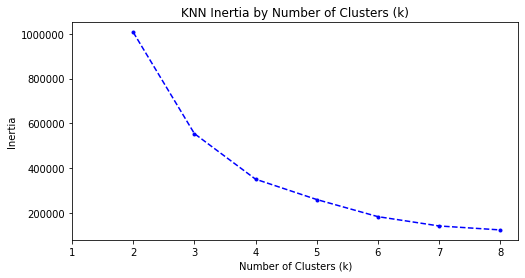

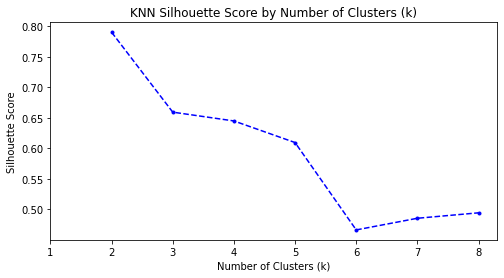

In [30]:
k_max = 8
inertia_scores = np.zeros((k_max-1,1))
silhouette_scores = np.zeros((k_max-1,1))
k_list = np.zeros((k_max-1,1))
for k in range(2,k_max+1):
    ind = k-2
    k_list[ind] = k
    kmeans_k = KMeans(n_clusters=k)
    inertia_scores[ind] = kmeans_k.fit(X_train).inertia_
    silhouette_scores[ind] = silhouette_score(X_train, kmeans_k.labels_)

plt.figure(figsize=(8, 4))
plt.plot(k_list, inertia_scores, "b.--")
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('KNN Inertia by Number of Clusters (k)')
plt.xticks(np.arange(1,k_max+1, step=1))
plt.ticklabel_format(axis='y', style='plain')

plt.figure(figsize=(8, 4))
plt.plot(k_list, silhouette_scores, "b.--")
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('KNN Silhouette Score by Number of Clusters (k)')
plt.xticks(np.arange(1,k_max+1, step=1))

In [31]:
k = 2
kmeans = KMeans(n_clusters=k)
kmeans_scores = cross_val_score(kmeans, X_train, y_train, cv=10, scoring='accuracy')
kmeans_scores.mean()

0.5566541822721598

## SVM

In [32]:
from sklearn.svm import SVC

svm_clf = SVC(gamma='auto')
svm_clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [33]:
svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10, scoring = 'accuracy')
svm_scores.mean()                            

0.705980024968789

## Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100)
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10, scoring='accuracy')
forest_scores.mean()

0.8081523096129837

In [35]:
forest_clf.fit(X_train, y_train)
for name, score in zip(X_train.columns, forest_clf.feature_importances_):
    print(name, round(score,2))

Pclass 0.09
Sex 0.26
Age 0.26
SibSp 0.05
Parch 0.04
Fare 0.27
Embarked 0.03


## Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression

In [37]:
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
log_reg_scores = cross_val_score(log_reg, X_train, y_train, cv=10, scoring='accuracy')
log_reg_scores.mean()

0.8058551810237203

## Create a Base Estimator
For comparison (should at least beat this)

In [0]:
from sklearn.base import BaseEstimator

class WomenAndChildrenClassifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        y_out = np.zeros((X.shape[0],1))
        y_out[(X.Sex == 1) | (X.Age <=12)] = 1
        return y_out

In [39]:
womenchildren_clf = WomenAndChildrenClassifier()
womenchildren_scores = cross_val_score(womenchildren_clf, X_train, y_train, cv=10, scoring='accuracy')
womenchildren_scores.mean()

0.7923970037453183

## Initial Model Comparison

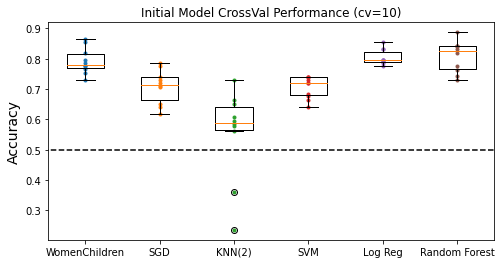

In [40]:
plt.figure(figsize=(8, 4))
plt.plot([1]*10, womenchildren_scores, '.')
plt.plot([2]*10, sgd_scores, ".")
plt.plot([3]*10, kmeans_scores, ".")
plt.plot([4]*10, svm_scores, ".")
plt.plot([5]*10, log_reg_scores, ".")
plt.plot([6]*10, forest_scores, ".")
plt.boxplot([womenchildren_scores, sgd_scores, kmeans_scores, svm_scores, log_reg_scores, forest_scores],\
            labels=("WomenChildren", "SGD", "KNN(2)", "SVM", "Log Reg", "Random Forest"))
plt.plot([0, 7], [0.5, 0.5], 'k--')
plt.xlim((.5,6.5))
plt.ylabel("Accuracy", fontsize=14)
plt.title('Initial Model CrossVal Performance (cv=10)')
plt.show()

**Conclusions:**
*     SGD and KNN perform poorly
*     Logistic Regression and Random Forests show promise
*     Just picking women and children seems to work well (no learning at all)


**Improve Training Models:**<br>
Attempt to improve SVM, Logistic Regression, and Random Forest performance
*     Try adding/combining features
*     Hyperparameter tuning

In [41]:
X_train2 = X_train.copy()
X_train2.drop(['SibSp', 'Parch'], axis=1, inplace=True)
X_train2['RelativesOnBoard'] = X_train['SibSp'] + X_train['Parch']
X_train2

,Pclass,Sex,Age,Fare,Embarked,RelativesOnBoard
0,3,0,22.0,7.2500,3,1
1,1,1,38.0,71.2833,1,1
2,3,1,26.0,7.9250,3,0
3,1,1,35.0,53.1000,3,1
4,3,0,35.0,8.0500,3,0
...,...,...,...,...,...,...
886,2,0,27.0,13.0000,3,0
887,1,1,19.0,30.0000,3,0
888,3,1,21.5,23.4500,3,3
889,1,0,26.0,30.0000,1,0


**Other ways to increase accuracy with features:**
*     Add buckets for various titles from `Name` info
*     Age buckets?

In [0]:
sgd_scores2 = cross_val_score(sgd_clf, X_train2, y_train, cv=10, scoring='accuracy')
kmeans_scores2 = cross_val_score(kmeans, X_train2, y_train, cv=10, scoring='accuracy')
svm_scores2 = cross_val_score(svm_clf, X_train2, y_train, cv=10, scoring = 'accuracy')
forest_scores2 = cross_val_score(forest_clf, X_train2, y_train, cv=10, scoring='accuracy')
log_reg_scores2 = cross_val_score(log_reg, X_train2, y_train, cv=10, scoring='accuracy')

In [43]:
forest_clf.fit(X_train2, y_train)
for name, score in zip(X_train2.columns, forest_clf.feature_importances_):
    print(name, round(score,2))

Pclass 0.09
Sex 0.27
Age 0.27
Fare 0.26
Embarked 0.03
RelativesOnBoard 0.08


In [44]:
data = {
    'model': ['SGD', 'KNN(2)', 'SVM', 'LR', 'RF'],
    'scores1': [sgd_scores.mean(), kmeans_scores.mean(), svm_scores.mean(), 
                log_reg_scores.mean(), forest_scores.mean()],
    'scores2': [sgd_scores2.mean(), kmeans_scores2.mean(), svm_scores2.mean(), 
                log_reg_scores2.mean(), forest_scores2.mean()]
}
df_scores = pd.DataFrame(data)
df_scores

,model,scores1,scores2
0,SGD,0.708190,0.690262
1,KNN(2),0.556654,0.625194
2,SVM,0.705980,0.707116
3,LR,0.805855,0.801361
4,RF,0.808152,0.802534


### Make Predictions with Test Set

In [0]:
sgd_clf.fit(X_train, y_train)
sgd_pred = sgd_clf.predict(X_test)

In [0]:
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)

In [0]:
kmeans.fit(X_train, y_train)
kmeans_pred = kmeans.predict(X_test)

In [0]:
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)

In [0]:
forest_clf.fit(X_train, y_train)
forest_pred = forest_clf.predict(X_test)

In [0]:
pred_survivors = {
    'model': data['model'],
    'num survivors': [sgd_pred.sum(), kmeans_pred.sum(), svm_pred.sum(),
                      log_reg_pred.sum(), forest_pred.sum()]
}
df_survivors = pd.DataFrame(pred_survivors)

In [51]:
df_survivors

,model,num survivors
0,SGD,0
1,KNN(2),31
2,SVM,136
3,LR,133
4,RF,137


In [52]:
print('Test Set Size: %d' % X_test.Age.shape[0])

Test Set Size: 331
